## Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

## Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

- Target: Claim Status (Claim)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Age of insured (Age)
- The identification record of every observation (ID)

# Evaluation Metric
The evaluation metric for this task will be **precision_score**.

**=========================================Data Analaysis Begins=========================================**

### Importing Necessary Pacakages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
#from seaborn_qqplot import pplot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score,f1_score
#from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.preprocessing import PowerTransformer
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

Defining path for data files

In [2]:
train_path='./train.csv'
test_path='./test.csv'

Loading data

In [3]:
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)

Getting intution about data with head and describe

In [4]:
df_test.head()

ID Agency    Agency Type Distribution Channel              Product Name  \
0  17631    EPX  Travel Agency               Online         Cancellation Plan   
1  15064    EPX  Travel Agency               Online  1 way Comprehensive Plan   
2  14139    C2B       Airlines               Online               Bronze Plan   
3  19754    EPX  Travel Agency               Online  2 way Comprehensive Plan   
4  16439    C2B       Airlines               Online               Silver Plan   

   Duration                Destination  Net Sales  Commision (in value)  Age  
0       192                  HONG KONG       18.0                  0.00   36  
1         2                  SINGAPORE       20.0                  0.00   36  
2        13                  SINGAPORE       13.5                  3.38   24  
3       133  TAIWAN, PROVINCE OF CHINA       41.0                  0.00   36  
4         2                  SINGAPORE       30.0                  7.50   32

In [5]:
df_test.describe()

ID      Duration     Net Sales  Commision (in value)  \
count  22421.000000  22421.000000  22421.000000          22421.000000   
mean   15499.196646     59.100665     49.446070             12.316924   
std     2606.751171    114.819397     61.794609             22.957306   
min    11000.000000     -1.000000   -297.000000              0.000000   
25%    13236.000000     10.000000     19.800000              0.000000   
50%    15515.000000     24.000000     29.518868              0.000000   
75%    17762.000000     58.000000     56.000000             13.630000   
max    20000.000000   4857.000000    810.000000            283.500000   

                Age  
count  22421.000000  
mean      39.784889  
std       13.910773  
min        1.000000  
25%       34.000000  
50%       36.000000  
75%       43.000000  
max      118.000000

In [6]:
df_train.describe()

ID      Duration     Net Sales  Commision (in value)  \
count  52310.000000  52310.000000  52310.000000          52310.000000   
mean    6005.745804     58.256108     48.554673             12.219963   
std     2306.450475    109.138708     60.198589             22.847645   
min     2000.000000     -2.000000   -389.000000              0.000000   
25%     4015.000000     10.000000     19.800000              0.000000   
50%     6002.000000     24.000000     29.500000              0.000000   
75%     8004.000000     57.000000     55.000000             13.380000   
max    10000.000000   4881.000000    682.000000            262.760000   

                Age         Claim  
count  52310.000000  52310.000000  
mean      39.555725      0.166699  
std       13.762473      0.372710  
min        0.000000      0.000000  
25%       33.000000      0.000000  
50%       36.000000      0.000000  
75%       43.000000      0.000000  
max      118.000000      1.000000

# Question to Ask:

- How Duration can be negative, values are in Train and Test Both.
- Amount of Net Sales is in Negative in both Train and Test.


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


Above summary shows no column has **"Null"** Values. We can also see there are 6 columns having numerical data and other are categorical data.

## Segregating Numerical and Object data

In [8]:
numerical_cols=df_train.select_dtypes(include=['int64','float64'])
categorical_cols=df_train.select_dtypes(include='object')

In [9]:
categorical_cols.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

### With above information and basic analysis we can conclude following:
- **ID:** Numerical value for reference, No significane in stastical analysis.
- **Duration:** 
    - has values in negative. Which is not possible, Time can't be in negative. This will need further analysis as how many occurances of such data.
    - has High Variance
    - Standard Deviation of 109 against mean 58 suggest data is largely dispersed
- **Net Sales:**
    - Has Values in negative. Need more investigation.
    - Data is releativley clsoer to mean
    - variance is high
- **Commision (in value):**
    - closer to mean
    - no negative value
    - 50% data has value as 0
- **Age:**
    - Age having Min as 0 suggests unit is in years.
    - Standard Deviation is low suggest data is closer to mean.
- **Claim:**
    - Boolean value and is target Variable
    

In [10]:
numerical_cols = numerical_cols.copy()
#Droping ID from Numerical Columns
numerical_cols.drop(columns=["ID","Claim"],axis=1,inplace=True)

## Opeartion on Numerical Data
### Checking skewness 

In [11]:
skew_check={}
for i in numerical_cols.columns:
    skew_check[i]=numerical_cols[i].skew()

In [12]:
skew_check

{'Duration': 15.3525235978114,
 'Net Sales': 2.811837338046441,
 'Commision (in value)': 3.5356943446774736,
 'Age': 2.9478911827909426}

Above value shows All numerical data is **postive skewed**.Applying Transformation techniques for data to follow **Guassian distribution**

In [13]:
#np.quantile(df_train_logtransformed,q = [0.1, 0.2, 0.3])
seq = np.linspace(0,1,101)
pd.DataFrame(df_train['Net Sales'].quantile(seq)).T

0.00  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  ...  \
Net Sales -389.0   0.0   0.0   0.0  2.12   9.9  10.0  10.0  10.0  10.0  ...   

            0.91   0.92   0.93        0.94        0.95   0.96        0.97  \
Net Sales  112.0  112.0  128.7  164.069017  201.598537  216.0  246.901143   

             0.98    0.99   1.00  
Net Sales  252.85  291.75  682.0  

[1 rows x 101 columns]

In [14]:
df_train['Net Sales'].describe()

count    52310.000000
mean        48.554673
std         60.198589
min       -389.000000
25%         19.800000
50%         29.500000
75%         55.000000
max        682.000000
Name: Net Sales, dtype: float64

###  Checking Correlation between Feature

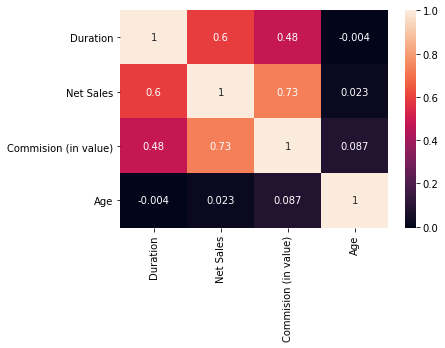

In [15]:
sns.heatmap(numerical_cols.corr(),annot=True)
plt.show()

Heatmap & pairplot of correlation matrix above suggest there is correlation between "Net Sales" & "Commison", however they are not highly correlated hence **can't drop**.

All the numerical Features are independent in nature.

## Opeartion on Categorical Data

In [16]:
categorical_cols.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [17]:
for i in categorical_cols:
    print("Column {} has {} unique values".format(i,len(categorical_cols[i].value_counts())))

Column Agency has 16 unique values
Column Agency Type has 2 unique values
Column Distribution Channel has 2 unique values
Column Product Name has 25 unique values
Column Destination has 97 unique values


Analysing above data it suggests columns **"Agency Type"** & **"Agency"** are of Boolean in nature.However rest 3 columns are of Non Boolean in nature hence opting for **LabelEncoding**.

In [18]:
le=preprocessing.LabelEncoder() #Intialising LabelEncoder Model
df_train_enc=pd.DataFrame() #Creating Empty Dataframe to store encoded Values
for i in (categorical_cols.columns): #Looping through to encode each columns
    df_train_enc[i] = le.fit_transform(df_train[i])

In [19]:
df_train_enc.head() #Checking for encoded values

Agency  Agency Type  Distribution Channel  Product Name  Destination
0       7            1                     1            10           68
1       7            1                     1            10           53
2       6            1                     1            16           84
3       7            1                     1             1           33
4       7            1                     1             1           53

Merging dataframes (Encoded +Tranformed)

In [20]:
df_train_Modified=pd.concat([numerical_cols,df_train_enc],axis=1) #Adding both dataframes

In [21]:
df_train_Modified.head()
#df_train_clean_power['Net Sales'].min()

Duration  Net Sales  Commision (in value)  Age  Agency  Agency Type  \
0        61       12.0                  0.00   41       7            1   
1         4       17.0                  0.00   35       7            1   
2        26       19.8                 11.88   47       6            1   
3        15       27.0                  0.00   48       7            1   
4        15       37.0                  0.00   36       7            1   

   Distribution Channel  Product Name  Destination  
0                     1            10           68  
1                     1            10           53  
2                     1            16           84  
3                     1             1           33  
4                     1             1           53

### Applying Feature Selection Technique

In [22]:
clean_skew=df_train_Modified.skew()

clean_skew

Duration                15.352524
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
Agency                  -0.097111
Agency Type             -0.718350
Distribution Channel    -7.465242
Product Name             0.332685
Destination             -0.590582
dtype: float64

## Model Building

### Splliting data in Feature and Target variable

In [23]:
#Data with Log Transformed
X=df_train_Modified #Features
y=df_train['Claim'] #Target

In [24]:
# Train Test Split Log Transformed Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [25]:
#Checking for shape of Training data
print("Shape of X Train:",X_train.shape," & Y Train is ",y_train.shape)

Shape of X Train: (41848, 9)  & Y Train is  (41848,)


### Model Selection

#### Trying Decision Tree

#### Trying Random Forest

In [ ]:
#Base Model
perf_report=pd.DataFrame()
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rf_score=accuracy_score(y_test,y_pred)
rf_precision_score=precision_score(y_test,y_pred)
perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'Random Forest',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])


final_pred=rf.predict(X_test)

In [44]:
from sklearn.model_selection import GridSearchCV

In [35]:
#Paramter Tuning
max_features=['sqrt','log2']
max_depth=[10,20,30,40,50]
min_samples_leaf=[1,2,5]
criterion=['gini','entropy']
n_estimators=[100,500,1000]
class_weight=['balanced','balanced_subsample']

grid_param={"max_features":max_features,
            "max_depth":max_depth,
            "min_samples_leaf":min_samples_leaf,
            "criterion":criterion,
            "n_estimators":n_estimators,
            "class_weight":class_weight}

rf=RandomForestClassifier()

rf_modal_selection=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,n_iter=500,cv=5,random_state=3)

rf_modal_selection.fit(X_train,y_train)
print(rf_modal_selection.best_params_)

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto'

{'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}


In [50]:
#Paramter Tuning

grid_param={"n_estimators":[500,600]
            }

rf=RandomForestClassifier(min_samples_leaf=1,max_features='log2',max_depth=40,criterion='gini',class_weight='balanced_subsample')

rf_modal_selection=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5)

rf_modal_selection.fit(X_train,y_train)
print(rf_modal_selection.best_params_)
perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'Random Forest_CV',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

{'n_estimators': 600}


In [38]:
rf=RandomForestClassifier(n_estimators=1000,min_samples_leaf=1,max_features='log2',max_depth=40,criterion='gini',class_weight='balanced_subsample')

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'RF_Tuned_1K',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

In [ ]:
rf=RandomForestClassifier(n_estimators=500,min_samples_leaf=1,max_features='log2',max_depth=40,criterion='gini',class_weight='balanced_subsample')

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'RF_Tuned',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

#### Trying XG Boost

In [29]:
xgb=XGBClassifier(base_estimator=rf,random_state=3)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
xgb_score=accuracy_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'XG Boost',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

[08:04:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [47]:
GBC=GradientBoostingClassifier(max_depth = 3, min_samples_split = 2)

grid_param={'learning_rate': [0.1,0.5]}

GBC_modal_selection=GridSearchCV(estimator=GBC,param_grid=grid_param,cv=5)

GBC_modal_selection.fit(X_train,y_train)
print(GBC_modal_selection.best_params_)

perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'GBC_Tuned_Grid',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

{'learning_rate': 0.5}


In [51]:
perf_report.sort_values(by=['Precision'],ascending=False)

model  Accuracy  Precision    Recall        F1
0     Random Forest  0.942936   0.854870  0.784463  0.818154
0          RF_Tuned  0.945135   0.854738  0.800818  0.826900
0       RF_Tuned_1K  0.945230   0.854387  0.801986  0.827358
0         GBC_Tuned  0.945230   0.854387  0.801986  0.827358
0    GBC_Tuned_Grid  0.945230   0.854387  0.801986  0.827358
0  Random Forest_CV  0.945230   0.854387  0.801986  0.827358
0          XG Boost  0.927643   0.813115  0.724299  0.766141
0               GBC  0.920187   0.811656  0.667056  0.732286

In [32]:
#parameters of GBC
GBC.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [33]:
#Parameters of RandomForest
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}